In [1]:
import base64
import datetime
import json
import os
import random
import time

import scipy
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
sns.set(font_scale=1.0)
rcParams['figure.figsize'] = 8, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Load the Data

In [2]:
d = pd.read_json('tmp/raw_data.json')
d.index.name = 'id'
d = d[['price', 'bedrooms']]
print len(d)

124011


In [3]:
d.dtypes

price       int64
bedrooms    int64
dtype: object

In [4]:
d.price.head()

id
0       2950
1       2850
10      3000
100     3758
1000    3300
Name: price, dtype: int64

# Log Price

(0, 15000)

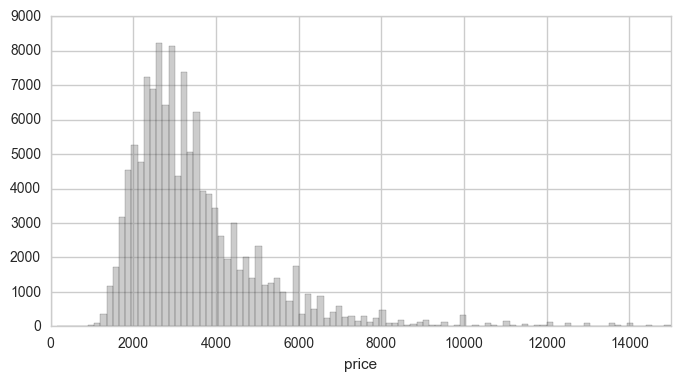

In [5]:
plt.figure(figsize=(8, 4))
ax = sns.distplot(a=d.loc[d['price'] < 15000, 'price'], color='grey', kde=False, bins=100)
plt.xlim((0, 15000))

(0, 10)

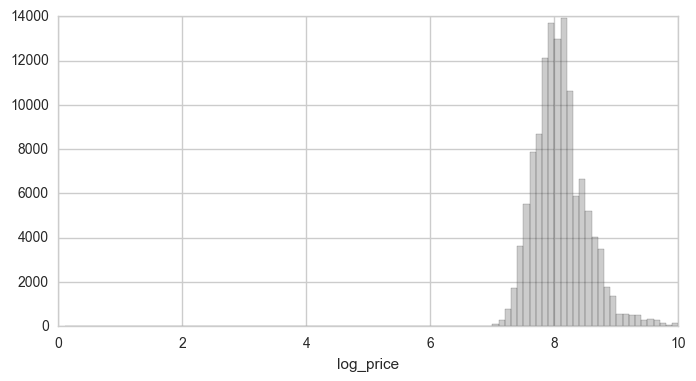

In [6]:
d['log_price'] = np.log(d.price)
plt.figure(figsize=(8, 4))
ax = sns.distplot(a=d.loc[d['log_price'] < 10, 'log_price'], color='grey', kde=False, bins=100)
plt.xlim((0, 10))

# Price Bucket

In [7]:
noise = np.random.randn(len(d))
d['price_quantile_10'] = pd.qcut((d.price + 0.1*noise), 10, [0.1 * i for i in range(0, 10)])
d['price_quantile_100'] = pd.qcut((d.price + 0.1*noise), 100, [0.01 * i for i in range(0, 100)])

# Price Bucket with Same Number of Bedrooms

In [8]:
d['price_quantile_10_bedrooms'] = np.nan
for b in d.bedrooms.value_counts().index:
    noise = np.random.randn(len(d[d.bedrooms == b]))
    d.loc[d.bedrooms == b, 'price_quantile_10_bedrooms'] = \
        pd.qcut((d.loc[d.bedrooms == b, 'price'] + 0.1*noise), 10, [0.1 * i for i in range(0, 10)])

In [9]:
d['price_quantile_100_bedrooms'] = np.nan
for b in d.bedrooms.value_counts().index:
    noise = np.random.randn(len(d[d.bedrooms == b]))
    d.loc[d.bedrooms == b, 'price_quantile_100_bedrooms'] = \
        pd.qcut((d.loc[d.bedrooms == b, 'price'] + 0.1*noise), 100, [0.01 * i for i in range(0, 100)])

# Save the Data

In [10]:
del d['bedrooms']

In [11]:
d.to_csv('tmp/features_price.csv')